In [3]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
from textwrap import wrap
import matplotlib.dates as mdates
import statsmodels.formula.api as smf

In [4]:
## Date Erdogan swore his oath to be president
oath_of_office = datetime.datetime.strptime('2014-08-28', "%Y-%m-%d")
## Date all proposed ammendments to the constitution approved by parliament
ammendments_approved = datetime.datetime.strptime('2017-01-20', "%Y-%m-%d")
## Date of the national referendum
referendum_vote = datetime.datetime.strptime('2017-04-16', "%Y-%m-%d")
## Date the referendum too effect
effect = datetime.datetime.strptime('2019-03-19', "%Y-%m-%d")
last_speech = datetime.datetime.strptime('2022-08-12', "%Y-%m-%d")

dates = [oath_of_office, ammendments_approved, referendum_vote, effect, last_speech]
names = ['Oath of office', 'Proposal of\nreferendum', 'Referendum vote', 'Results take effect', 'Most recent speech\nin data set']

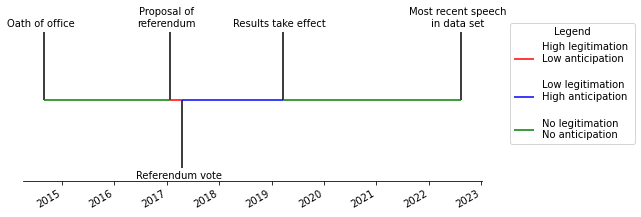

In [5]:
# Choose some nice levels
# levels = np.tile([1/5, 1/5, -1/5, 1/5, 1/5],
#                  1)[:len(dates)]
levels = [float(0.2), float(0.2), -float(0.2), float(0.2), float(0.2)]
# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 2.9), constrained_layout=True)
# ax.set(title="Matplotlib release dates")

ax.vlines(dates, 0, levels, color="black")  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o",
        color="k", alpha=0, markerfacecolor="w")  # Baseline and markers on it.

ax.hlines([0], xmin=oath_of_office, xmax=ammendments_approved, color="green")

ax.hlines([0], xmin=ammendments_approved, xmax=referendum_vote, color="red", label='High legitimation \nLow anticipation\n')

ax.hlines([0], xmin=referendum_vote, xmax=effect, color="blue", label='Low legitimation \nHigh anticipation\n')

ax.hlines([0], xmin=effect, xmax=last_speech, color="green", label='No legitimation \nNo anticipation')

# annotate lines
for d, l, r in zip(dates, levels, names):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="bottom" if l > 0 else "top")

# format xaxis with 4 month intervals
# ax.xaxis.set_major_locator(mdates.MonthLocator(intrval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)

ax.margins(y=0.1)
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.savefig("Timeline.pdf", bbox_inches='tight')
plt.show()
